<a href="https://colab.research.google.com/github/jugalshirodkar/AIML/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving airbnb.csv to airbnb.csv
Dataset Loaded:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private ro

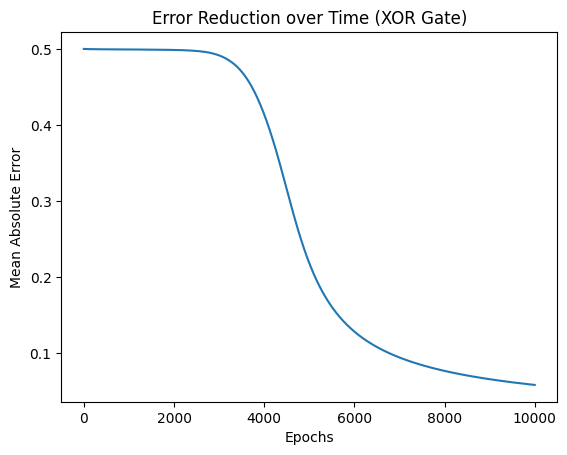

Final Output for XOR Gate:
[[0.06164506]
 [0.94418211]
 [0.94419779]
 [0.05928035]]
Predictions for XOR Gate:
[[0.06163868]
 [0.94418828]
 [0.94420396]
 [0.05927355]]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload your CSV file in Google Colab
uploaded = files.upload()

# Assuming the file name is 'airbnb.csv', we load it
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Display the first few rows of the dataset
print("Dataset Loaded:")
print(data.head())

# XOR Gate Input and Output
# Manually defining the XOR input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights and biases
np.random.seed(42)  # For reproducibility
weights_input_hidden = 2 * np.random.random((2, 2)) - 1
bias_hidden = 2 * np.random.random((1, 2)) - 1
weights_hidden_output = 2 * np.random.random((2, 1)) - 1
bias_output = 2 * np.random.random((1, 1)) - 1

# Training parameters
learning_rate = 0.1
epochs = 10000
errors = []

# Training the MLP for XOR Gate
for epoch in range(epochs):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output = sigmoid(output_layer_input)

    # Calculate the error
    error = y - output
    errors.append(np.mean(np.abs(error)))  # Track the error

    # Backpropagation
    d_output = error * sigmoid_derivative(output)
    error_hidden_layer = d_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Plot the error over epochs to visualize training
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Error Reduction over Time (XOR Gate)')
plt.show()

# Display final output for XOR Gate
print("Final Output for XOR Gate:")
print(output)

# Function to predict output based on current weights
def model(X):
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output = sigmoid(output_layer_input)
    return output

# Test XOR Gate with the input data
predictions = model(X)
print("Predictions for XOR Gate:")
print(predictions)
